### Higher Diploma in Science - Data Analytics 2020/21

### Fundamentals of Data Analysis Project

#### Prepared by: Fiona Lee 
#### Due Date - 8 January 2021


***

### Fundamentals of Data Analysis - Project Instructions:

In  this  project  you  must  perform  and  explain  simple  linear  regression  using  Python on the power production dataset available on Moodle.  

The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

Your submission must be in the form of a git repository containing, at a minimum, thefollowing items:

1.  Jupyter notebook that performs simple linear regression on the data set.
2.  In that notebook, an explanation of your regression and an analysis of its accuracy.
3.  Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to other types of regression on this data set. 

***

### Import Modules 
<BR>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

***

### Import the Dataset
<BR>

In [2]:
df = pd.read_csv('Wind-Power.csv')
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


***

### High Level Analysis
<BR>

In [3]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [4]:
df.mean()

speed    12.590398
power    48.014584
dtype: float64

In [20]:
print (df.shape)

(500, 2)


***

### Visualise the Data
<BR>

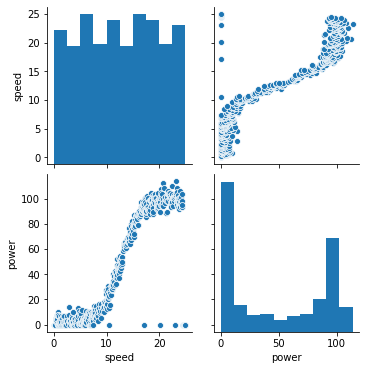

In [5]:
sns.pairplot (df);

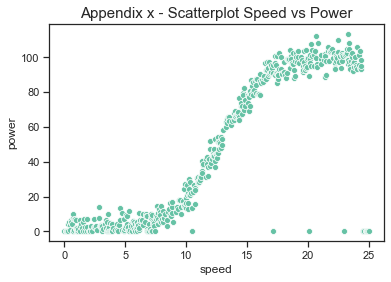

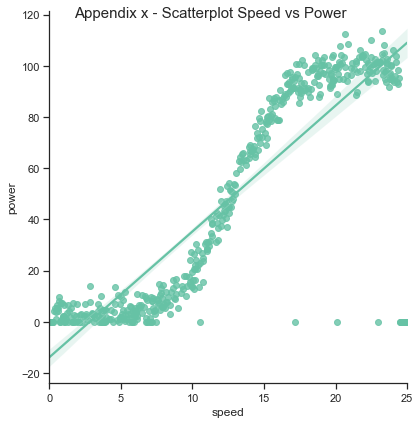

In [12]:
print("")
sns.set (style = "whitegrid", palette ='Set2')
sns.set_style ("ticks")
ax = sns.scatterplot (x = "speed", y ="power", data = df)
ax.set_title ("Appendix x - Scatterplot Speed vs Power" , fontsize = 15)
a4_dims = (11.7, 8.27)
fig, ax = sns.figsize = a4_dims
plt.show()
print ("")
# SCATTERPLOT - WITH REGRESSION LINES
# Ref Source: https://stackoverflow.com/questions/46307941/how-can-i-add-title-on-seaborn-lmplot
sns.set_style ("whitegrid")
sns.set_style ("ticks")
ax = sns.lmplot (x = "speed" , y = "power" , palette = 'Set2', data = df, height = 6)
ax.fig.suptitle ("Appendix x - Scatterplot Speed vs Power", fontsize = 15)
a4_dims = (11.7, 8.27)
fig, ax = sns.figsize = a4_dims
plt.show()


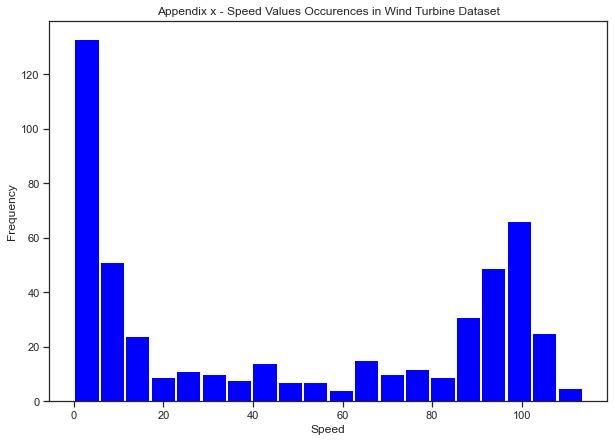

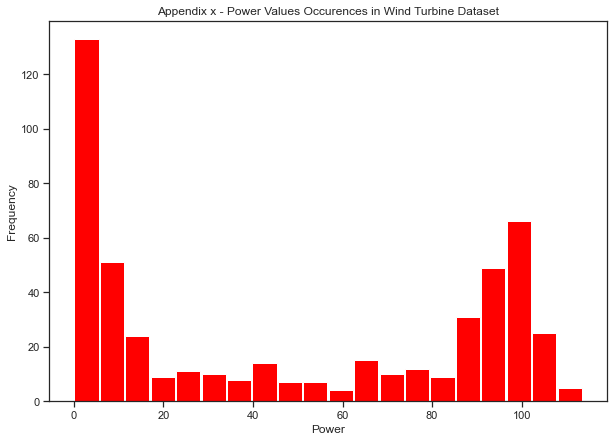

In [14]:
plt.figure(figsize = (10, 7)) 
x = df ["power"] 
plt.hist(x, bins = 20, color = "blue", rwidth = 0.95) 
plt.title("Appendix x - Speed Values Occurences in Wind Turbine Dataset") 
plt.xlabel("Speed") 
plt.ylabel("Frequency") 
plt.show()

plt.figure(figsize = (10, 7)) 
x = df ["power"] 
plt.hist(x, bins = 20, color = "red", rwidth = 0.95) 
plt.title("Appendix x - Power Values Occurences in Wind Turbine Dataset") 
plt.xlabel("Power") 
plt.ylabel("Frequency") 
plt.show()

In [19]:
print (df.groupby(['speed']).agg(['mean', 'median' , 'std', 'min', 'max']))

       power                     
        mean median std  min  max
speed                            
0.000    0.0    0.0 NaN  0.0  0.0
0.125    0.0    0.0 NaN  0.0  0.0
0.150    0.0    0.0 NaN  0.0  0.0
0.225    0.0    0.0 NaN  0.0  0.0
0.275    0.0    0.0 NaN  0.0  0.0
...      ...    ...  ..  ...  ...
24.775   0.0    0.0 NaN  0.0  0.0
24.850   0.0    0.0 NaN  0.0  0.0
24.875   0.0    0.0 NaN  0.0  0.0
24.950   0.0    0.0 NaN  0.0  0.0
25.000   0.0    0.0 NaN  0.0  0.0

[500 rows x 5 columns]


***

### Predict expected power based on a given speed
<BR>

***

### Predict expected speed based on a given power
<BR>

***

***

#### End